In [173]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [174]:
data = pd.read_csv('../data/steam.csv')
#Drop unused values
data.drop(data.columns.difference(['positive_ratings','average_playtime']), 1, inplace=True)
data

,positive_ratings,average_playtime
0,124534,17612
1,3318,277
2,3416,187
3,1273,258
4,5250,624
5,2758,175
6,27755,1300
7,12120,427
8,3822,361
9,67902,691


In [175]:
data.describe()

,positive_ratings,average_playtime
count,2.707500e+04,27075.000000
mean,1.000559e+03,149.804949
std,1.898872e+04,1827.038141
min,0.000000e+00,0.000000
25%,6.000000e+00,0.000000
50%,2.400000e+01,0.000000
75%,1.260000e+02,0.000000
max,2.644404e+06,190625.000000


In [176]:
#Remove outliers
data = data.drop(data[data.average_playtime > 10000].index)
data.describe()

,positive_ratings,average_playtime
count,27025.000000,27025.000000
mean,820.058908,97.669528
std,7700.105772,452.855376
min,0.000000,0.000000
25%,6.000000,0.000000
50%,24.000000,0.000000
75%,124.000000,0.000000
max,515879.000000,9848.000000


In [177]:
X = DataFrame(data, columns=['positive_ratings'])
y = DataFrame(data, columns=['average_playtime'])

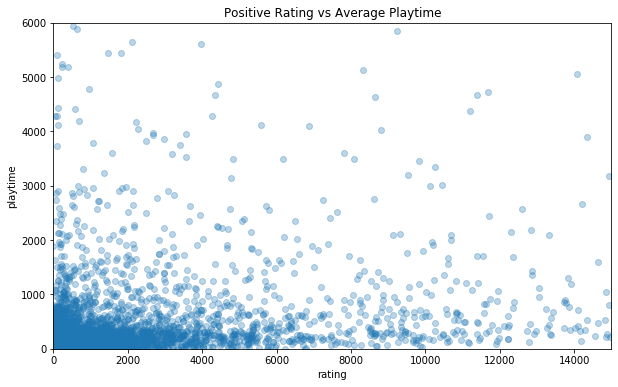

In [178]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3)
plt.title('Positive Rating vs Average Playtime')
plt.xlabel('rating')
plt.ylabel('playtime')
plt.ylim(0, 6000)
plt.xlim(0, 15000)
plt.show()

In [179]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
#Slope Coeffiicient
regression.coef_

array([[0.02803257]])

In [181]:
# Intercept
regression.intercept_

array([74.6811685])

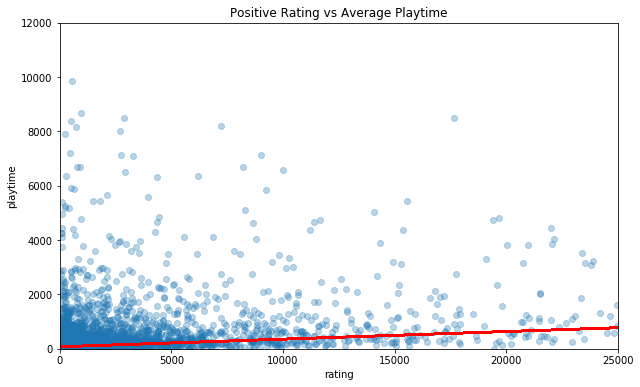

In [182]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3)
plt.plot(X, regression.predict(X), color='red', linewidth=2)
plt.title('Positive Rating vs Average Playtime')
plt.xlabel('rating')
plt.ylabel('playtime')
plt.ylim(0, 12000)
plt.xlim(0, 25000)
plt.show()

In [183]:
regression.score(X, y)

0.22719574455728087